With 11 jurors and 10,000 trials, we see an accuracy of: 0.7271
With 21 jurors and 10,000 trials, we see an accuracy of: 1.0
With 31 jurors and 10,000 trials, we see an accuracy of: 0.0003


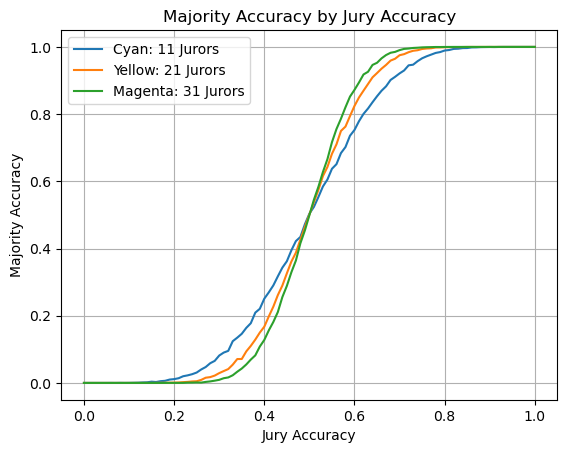

In [22]:
'''
Alex Kramer
DS 5110
Homework 1
Problem 1
'''

import random as rnd
import matplotlib.pyplot as plt

def accuracy(n, trials, color):
    individual_accuracy = rnd.uniform(0, 1)  # generate accuracy
    jury = [individual_accuracy] * n  # create a list of jurors with the same accuracy
    outcomes = [rnd.choice([0, 1]) for _ in range(trials)] # create outcomes using rnd
    verdicts = []
    
    # for each outcome in outcomes, create verdicts
    for out in outcomes:
        verdict = []
        for juror in jury:
            if rnd.random() < juror:
                verdict.append(out)
            else:
                verdict.append(1 - out)
        verdicts.append(max(set(verdict), key=verdict.count))

    # compute the jury majority verdict accuracy
    accuracy = sum(outcomes[i] == verdicts[i] for i in range(len(outcomes))) / len(outcomes)
    print('With', len(jury), 'jurors and 10,000 trials, we see an accuracy of:', accuracy)

    # calculate majority accuracy for different jury accuracies
    jury_accuracies = [i / 100 for i in range(101)]  # range from 0 to 1 with a step of 0.01
    majority_accuracies = []

    # for the whole jury append each individual verdict 
    for juror_accuracy in jury_accuracies:
        jury = [juror_accuracy] * n
        verdicts = []
        for out in outcomes:
            verdict = []
            for juror in jury:
                if rnd.random() < juror:
                    verdict.append(out)
                else:
                    verdict.append(1 - out)
            verdicts.append(max(set(verdict), key=verdict.count))
            
        # calculate majority vote
        majority_accuracy = sum(outcomes[i] == verdicts[i] for i in range(len(outcomes))) / len(outcomes)
        majority_accuracies.append(majority_accuracy)
    
    # plot jury accuracy by majority accuracy
    plt.plot(jury_accuracies, majority_accuracies)
    
def main():
    # 11 jurors
    accuracy(11, 10000, 'c')
    # 21 jurors
    accuracy(21, 10000, 'y')
    # 31 jurors
    accuracy(31, 10000, 'm')
    
    # plot / make graph look nice
    plt.xlabel('Jury Accuracy')
    plt.ylabel('Majority Accuracy')
    plt.title('Majority Accuracy by Jury Accuracy')
    plt.legend(['Cyan: 11 Jurors', "Yellow: 21 Jurors", "Magenta: 31 Jurors"])
    plt.grid(True)
    plt.show()
    
if __name__ == '__main__':
    main()